In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datasets import load_dataset
import scipy.stats as st
import ast


In [280]:
# Checking the working directory

import os

print(os.getcwd())

c:\Users\lisad\OneDrive\US_Data_Job_Listing_2022_to_2025


In [284]:
# Function to load a cleaned dataset from a pickle (.pkl) file
# Input: path (str) - file path to the pickle file
# Output: pandas DataFrame containing the loaded data

def load_data(path):
    """
    Loads a cleaned dataset from a pickle file.

    Parameters:
    path (str): Path to the .pkl file.

    Returns:
    pd.DataFrame: Loaded dataset as a pandas DataFrame.
    """
    return pd.read_pickle(path)



In [285]:
# Downloading the Pickle version cleanned dataset

df = load_data(r'c:\Users\lisad\OneDrive\US_Data_Job_Listing_2022_to_2025\df_clean.pkl')

In [286]:
# Create a copy of the original DataFrame for analysis purposes

df_copy = df.copy()

In [226]:
# Display summary information of the DataFrame df_copy

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61953 entries, 0 to 61952
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           61953 non-null  int64         
 1   index                61953 non-null  int64         
 2   title                61953 non-null  object        
 3   company_name         61953 non-null  object        
 4   location             61916 non-null  object        
 5   via                  61944 non-null  object        
 6   description          61953 non-null  object        
 7   extensions           61953 non-null  object        
 8   job_id               61953 non-null  object        
 9   thumbnail            38194 non-null  object        
 10  posted_at            61763 non-null  object        
 11  schedule_type        61707 non-null  object        
 12  work_from_home       27980 non-null  object        
 13  salary               10088 non-

In [287]:
# Filter df_copy DataFrame to include only data for the year 2023

df_2023 = df_copy[df_copy['year'] == 2023].copy()

In [228]:
# Display summary information of DataFrame: df_2023

df_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33413 entries, 0 to 61952
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           33413 non-null  int64         
 1   index                33413 non-null  int64         
 2   title                33413 non-null  object        
 3   company_name         33413 non-null  object        
 4   location             33391 non-null  object        
 5   via                  33404 non-null  object        
 6   description          33413 non-null  object        
 7   extensions           33413 non-null  object        
 8   job_id               33413 non-null  object        
 9   thumbnail            19571 non-null  object        
 10  posted_at            33413 non-null  object        
 11  schedule_type        33258 non-null  object        
 12  work_from_home       14624 non-null  object        
 13  salary               5658 non-null  

In [229]:
# Verifying the descriptive statistics for df_2023

df_2023.describe()

,Unnamed: 0,index,date_time,commute_time,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,year,month
count,33413.000000,33413.000000,33413,0.0,5658.000000,5356.000000,5356.000000,3767.000000,1880.000000,5658.000000,33413.0,33413.000000
mean,37941.402119,1134.835393,2023-06-27 21:23:02.104077056,NaN,33647.195528,28348.584882,39641.621314,41.170166,101144.306755,90768.423270,2023.0,6.392721
min,0.000000,0.000000,2023-01-01 04:00:11.178072,NaN,7.250000,8.000000,10.000000,7.250000,29289.840000,15080.000000,2023.0,1.000000
25%,24611.000000,517.000000,2023-03-22 03:00:46.837785088,NaN,30.000000,18.330000,40.000000,23.500000,81641.000000,61353.000000,2023.0,3.000000
50%,39496.000000,1102.000000,2023-07-04 03:00:11.406449920,NaN,57.500000,40.000000,75.000000,33.500000,96500.000000,88400.000000,2023.0,7.000000
75%,50340.000000,1691.000000,2023-09-30 03:00:46.436222976,NaN,81500.000000,70000.000000,95000.000000,57.500000,111608.625000,116480.000000,2023.0,9.000000
max,61952.000000,3228.000000,2023-12-31 04:00:20.281623,NaN,300000.000000,275000.000000,346000.000000,300.000000,300000.000000,624000.000000,2023.0,12.000000
std,15482.986883,714.296810,NaN,NaN,51011.117530,43125.572188,60130.229762,22.760203,31737.938135,43365.259619,0.0,3.522935


In [83]:
# Record keeping for filtered data from df_copy Data Frame

print(f'Filtered {len(df_2023):,} job postings for year 2023')

Filtered 33,413 job postings for year 2023


In [84]:
# Check Data Frame df_2023's filtered data validation

assert df_2023['year'].nunique() == 1 and df_2023['year'].iloc[0] == 2023

In [85]:
# Log shape changes between df_copy and df_2023 Data Frames

print(f'Original: {df_copy.shape[0]:,} rows -> 2023 subset: {df_2023.shape[0]:,} rows')

Original: 61,953 rows -> 2023 subset: 33,413 rows


## Dataset Overview

This dataset has been filtered to include only job postings from 2023. It contains cleaned data on job titles, salary information, locations, employment types, remote work options, and platforms (websites). Below is a breakdown of key metadata and the preparatory steps taken before analysis.


In [291]:
# Select and reorder relevant columns for analysis, and reset index for clarity

df_2023 = df_2023[[
'date_time','date', 'year', 'month',
'company_name', 'location','website',
'employment_type','remote_work', 
'seniority_level','clean_title',
'salary_standardized','salary_hourly', 
'salary_yearly', 'job_skills'
]].reset_index(drop=True)

In [87]:
# Assigning the data to a new DataFrame with reset index and renamed columns

df_2023_location = df_2023['location'].value_counts().head(10).reset_index()
df_2023_location.columns = ['location', 'count']

df_2023_location

,location,count
0,Anywhere,14624
1,United States,9610
2,"Oklahoma City, OK",1007
3,"Kansas City, MO",997
4,"Jefferson City, MO",708
5,"Bentonville, AR",424
6,"Tulsa, OK",377
7,"Wichita, KS",358
8,"Overland Park, KS",290
9,"Topeka, KS",281


## Top U.S. Locations for Data Job Listings (2023)

This bar chart displays the U.S. locations with the highest concentration of data job postings in 2023. It provides insights into where data professionals are most in demand across the country.

The data reveals that "Anywhere" and "United States" are the most frequently listed locations, likely representing remote or unspecified postings. Following these, cities such as Oklahoma City, Kansas City, and Jefferson City emerge as notable hubs for data job opportunities.

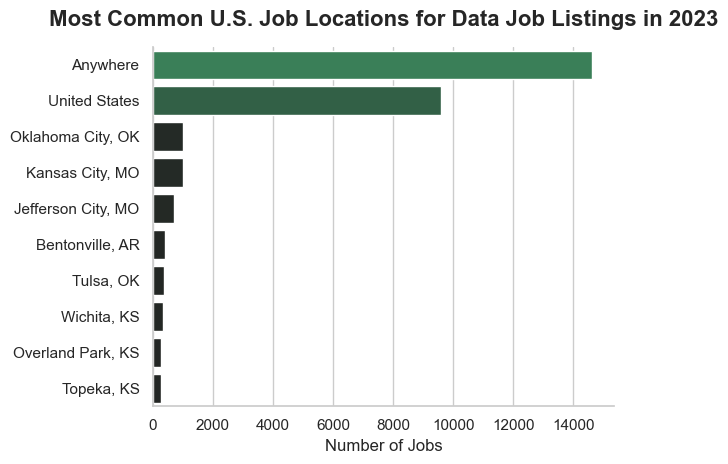

In [174]:
# Top U.S. Locations for data job interest — 2023 job market.

# Define chart style and color palette
sns.set_theme(style='whitegrid')
palette = sns.dark_palette('seagreen',n_colors=5, reverse=False, as_cmap=True)

# Plot the data and format the chart
sns.barplot(data=df_2023_location, x='count', y='location', hue='count', palette=palette, legend=False)
sns.despine()
plt.title('Most Common U.S. Job Locations for Data Job Listings in 2023', fontsize=16, fontweight='bold', pad = 15)
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Remote Work & Salary Insights for Analyst Roles (2023)

### Remote Work Availability in 2023

The pie chart below illustrates the distribution of data analyst job postings offering remote work options versus those that do not in 2023. This provides a clear overview of how flexible data roles were during that year.

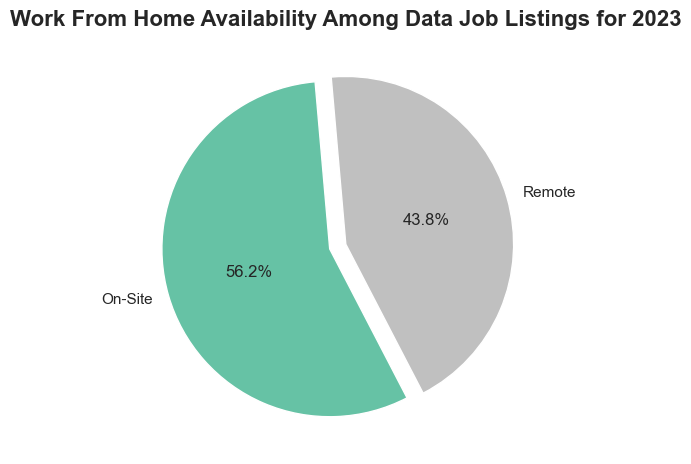

In [164]:
# Pie Chart: 2023 U.S. Data Job Listings with Remote Work Availability


# Count remote work availability categories
df_2023_pie_plot = df_2023['remote_work'].value_counts()

# Modify labels for clarity and extract slice sizes from data
labels = ['On-Site', 'Remote']
sizes = df_2023_pie_plot.values.tolist()
# Set colours to match labels
colours = ['#66c2a5', 'silver']
# Explode the first slice to emphasize it
explode = [0.1] + [0] * (len(labels) - 1)

# Plot the Pie Chart
df_2023_pie_plot.plot(kind='pie', labels=labels, startangle=95, autopct='%1.1f%%', 
              colors=colours, explode=explode, pctdistance=0.50)

# Add titles and chart formating
plt.title('Work From Home Availability Among Data Job Listings for 2023', fontsize=16, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [161]:
df_2023_pie_plot

remote_work
False    18789
True     14624
Name: count, dtype: int64

## Analyst Roles: Remote vs. Onsite Jobs with Salary Insights (2023)

This analysis explores how remote work flexibility correlates with median salaries for analyst roles in 2023. The horizontal bar chart below compares the median salaries between remote and onsite positions across various seniority levels

In [184]:
df_2023.columns

Index(['date_time', 'date', 'year', 'month', 'company_name', 'location',
       'website', 'employment_type', 'remote_work', 'seniority_level',
       'clean_title', 'salary_standardized', 'salary_hourly', 'salary_yearly',
       'job_skills'],
      dtype='object')

In [185]:
# Filter analyst roles with salary data

df_2023_analyst_remote_option = df_2023[df_2023['clean_title'].str.contains('analyst', case=False, na=False)
                                        & df_2023['salary_yearly'].notna()
                                        & df_2023['remote_work'].notna()
                                        & df_2023['seniority_level'].notna()
                                        ].copy()

df_2023_analyst_remote_option.sample(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
12015,2023-09-28 03:00:21.076670,2023-09-28,2023,9,General Dynamics Information Technology,Anywhere,indeed,Full-Time,True,,Data Analyst,83000.000,NaN,83000.000,"[power_bi, excel, spreadsheet, sql, word, vba]"
32894,2023-01-27 04:00:24.859222,2023-01-27,2023,1,Cox Communications,"Midwest City, OK",Recruiter.com,Full-Time,False,Senior,Data Analyst,96500.000,NaN,96500.000,"[tableau, jira, sql, microstrategy]"
17069,2023-04-09 03:00:12.719158,2023-04-09,2023,4,Adtalem Global Education,United States,wjhl jobs,Full-Time,False,Senior,Data Analyst,72940.495,NaN,72940.495,"[power_bi, tableau, sql, python]"
7659,2023-06-29 03:00:39.969204,2023-06-29,2023,6,Confidential Jobs,Anywhere,linkedin,Full-Time,True,Lead,Data Analyst,190000.000,NaN,190000.000,"[pyspark, power_bi, tableau, no-sql, airflow, ..."
33048,2023-02-25 04:00:35.619192,2023-02-25,2023,2,Cox Communications,"Oklahoma City, OK",Recruiter.com,Full-Time,False,Lead,Data Analyst,116700.000,NaN,116700.000,"[pandas, tableau, scikit-learn, ggplot2, sql, ..."


In [186]:
# Strip whitespace and drop empty strings

df_2023_analyst_remote_option['seniority_level'] = (
    df_2023_analyst_remote_option['seniority_level']
    .str.strip()  
    .replace('', np.nan)  #Treat empty strings as NaN values
)

In [187]:
# Count analyst job postings by remote status

analyst_remote_count_2023 = df_2023_analyst_remote_option['remote_work'].value_counts().reset_index()
analyst_remote_count_2023

,remote_work,count
0,False,1069
1,True,608


In [188]:
# Group by both remote work and seniority, and calculate median salary
analyst_median_salary_2023 = df_2023_analyst_remote_option.groupby(
    ['remote_work', 'seniority_level']
)['salary_yearly'].median().reset_index()
analyst_median_salary_2023

,remote_work,seniority_level,salary_yearly
0,False,Director,116950.00
1,False,Junior,60000.00
2,False,Lead,144481.50
3,False,Manager,116700.00
4,False,Mid-Level,110000.00
5,False,Principal,90000.00
6,False,Senior,96500.00
7,True,Director,150105.60
8,True,Executive,210000.00
9,True,Junior,73750.00


In [189]:
# Merge counts and median salary

analyst_median_salary_2023 = pd.merge(analyst_remote_count_2023, analyst_median_salary_2023, on='remote_work')
analyst_median_salary_2023

,remote_work,count,seniority_level,salary_yearly
0,False,1069,Director,116950.00
1,False,1069,Junior,60000.00
2,False,1069,Lead,144481.50
3,False,1069,Manager,116700.00
4,False,1069,Mid-Level,110000.00
5,False,1069,Principal,90000.00
6,False,1069,Senior,96500.00
7,True,608,Director,150105.60
8,True,608,Executive,210000.00
9,True,608,Junior,73750.00


In [190]:
# Renaming salary column for clarity

analyst_median_salary_2023 = analyst_median_salary_2023.rename(columns={'salary_yearly' : 'median_salary'})
analyst_median_salary_2023

,remote_work,count,seniority_level,median_salary
0,False,1069,Director,116950.00
1,False,1069,Junior,60000.00
2,False,1069,Lead,144481.50
3,False,1069,Manager,116700.00
4,False,1069,Mid-Level,110000.00
5,False,1069,Principal,90000.00
6,False,1069,Senior,96500.00
7,True,608,Director,150105.60
8,True,608,Executive,210000.00
9,True,608,Junior,73750.00


## Analyst Roles: Remote vs. Onsite Jobs with Salary Insights (2023)

This analysis examines how remote work flexibility correlates with median salaries for analyst roles in 2023. 
The horizontal bar chart below compares the median salaries between remote and onsite positions across various seniority levels.

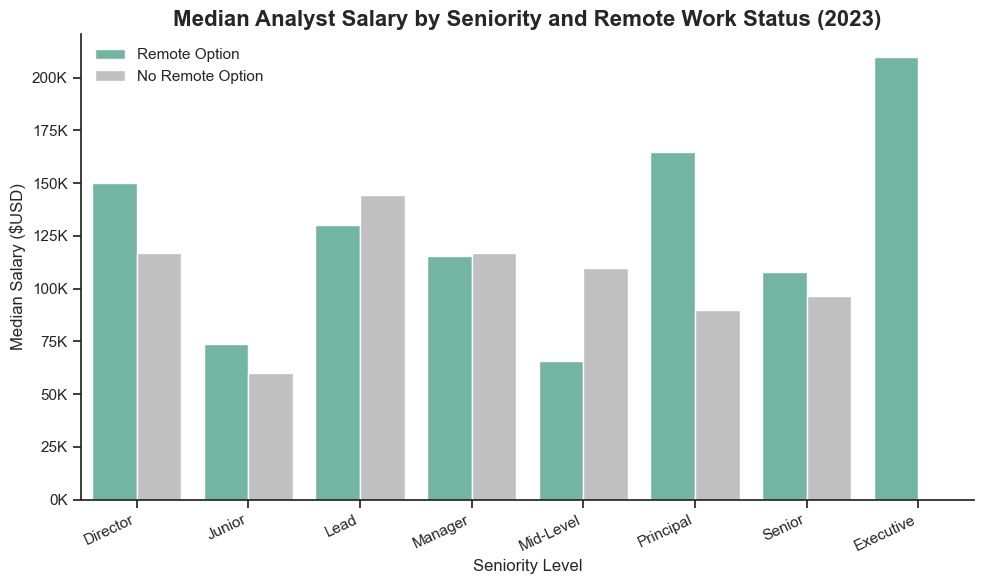

Text(0.5, -0.08, '*Note: Analyst roles with missing seniority information were excluded.This likely biased results toward executive-level, remote-friendly roles,inflating salaries in the remote category.')

<Figure size 640x480 with 0 Axes>

In [192]:
# Median Salary by Remote Work Status (2023 Analyst Job Posting Roles)

# Map remote_work boolean to readable labels
label_map = {True: 'Remote Option', False: 'No Remote Option'}
analyst_median_salary_2023['remote_label'] = analyst_median_salary_2023['remote_work'].map(label_map)

# Set theme
sns.set_theme(style='ticks')
plt.figure(figsize=(10, 6))

# Plot bar chart using mapped labels and fixed hue order
ax = sns.barplot(
    data=analyst_median_salary_2023,
    x='seniority_level',
    y='median_salary',
    hue='remote_label',
    hue_order=['Remote Option', 'No Remote Option'],  # Enforce order
    palette=['#66c2a5', 'silver']   # Remote = greenish, No Remote = silver
)

# Add labels and formatting
plt.title('Median Analyst Salary by Seniority and Remote Work Status (2023)', fontsize=16, fontweight='bold')
plt.xlabel('Seniority Level')
plt.ylabel('Median Salary ($USD)')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y/1000)}K'))
plt.xticks(rotation=25, horizontalalignment='right')
sns.despine()
plt.legend(frameon=False, loc='upper left') # Format legend for better visibility
plt.tight_layout()
plt.show()

# Add footnote below chart
plt.figtext(
    0.5, -0.08,
    '*Note: Analyst roles with missing seniority information were excluded.'
    'This likely biased results toward executive-level, remote-friendly roles,'
    'inflating salaries in the remote category.',
    wrap=True, ha='center', fontsize=9, style='italic'
)

# Employment Type for Data Roles (2023)
Full-Time, Part_time, contract and other work arrangement are shown in the chart below.
Understanding employment types helps identify how data jobs are being structured in 2023


In [99]:
# Prepare top 10 work arrangements for graphing

df_2023_schedule =df_2023['employment_type'].value_counts().head(10).reset_index()
df_2023_schedule.columns = ['employment_type', 'count']
df_2023_schedule

,employment_type,count
0,Full-Time,25098
1,Contract,7493
2,Part-Time,402
3,Internship,180
4,Other,157
5,Temporary,83


## Employment Types for Data Roles (2023)

The chart below illustrates the distribution of employment types—such as full-time, part-time, contract, and other work arrangements—among data roles in 2023. Understanding these employment structures provides valuable insights into how data positions are organized and the flexibility they offer.

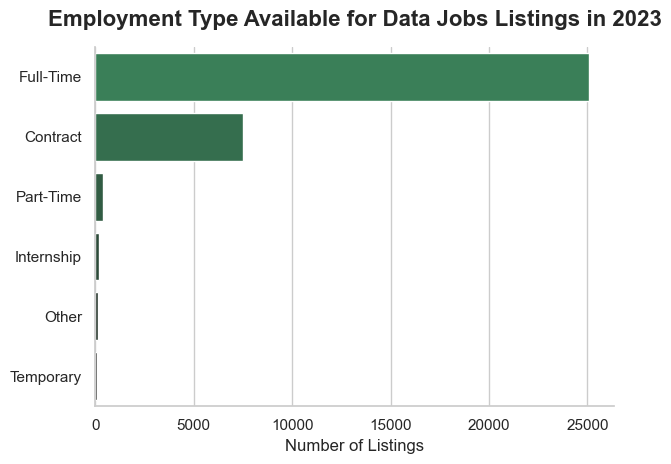

In [177]:
# Visualizing Employment Type Availability in 2023 U.S. Data Job Postings


# Define graph theme and color palette 
sns.set_theme(style='whitegrid')
palette = sns.dark_palette('seagreen')

# Plot the data
sns.barplot(data=df_2023_schedule,
             x='count', 
             y='employment_type', 
             hue='count', 
             palette=palette, 
             legend=False)

# Despine graph and set titles and labels
sns.despine()
plt.title('Employment Type Available for Data Jobs Listings in 2023', 
          fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Number of Listings')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Where Analyst Jobs Were Posted Most Often (2023)

This section identifies the top websites where analyst roles were posted in 2023. It also compares the posting volume and median salary per site.

In [292]:
# Filter job listings for Analyst titles with salary values and website information


df_2023_DA = df_2023[df_2023['clean_title'].str.contains('analyst', case=False, na=False)
                     & df_2023['salary_yearly'].notna()
                     & df_2023['website'].notna()
                     ].copy()
df_2023_DA.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
0,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Meta,Anywhere,linkedin,Full-Time,True,,Data Analyst,122000.0,NaN,122000.0,"[tableau, r, python, sql, test_skill]"
4,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Krispy Kreme,United States,linkedin,Contract,False,,Data Analyst,100000.0,NaN,100000.0,"[powerpoint, excel, outlook, word]"
14,2023-08-04 03:00:19.724974,2023-08-04,2023,8,CIBA Insurance Services,United States,ksnt jobs,Full-Time,False,Mid-Level,Data Analyst,110000.0,NaN,110000.0,"[excel, mssql, ssrs, sql]"
49,2023-08-04 03:00:23.798308,2023-08-04,2023,8,Sompo International,United States,linkedin,Full-Time,False,,Product Analyst,122500.0,NaN,122500.0,"[c, sap, sql]"
72,2023-08-04 03:00:28.680427,2023-08-04,2023,8,COOP Ale Works,"Oklahoma City, OK",linkedin,Full-Time,False,,Business Analyst,55000.0,NaN,55000.0,"[excel, tableau, python, sql]"


In [293]:
# Display a summary of df_2023_DA DataFrame

df_2023_DA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1677 entries, 0 to 33412
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            1677 non-null   datetime64[ns]
 1   date                 1677 non-null   object        
 2   year                 1677 non-null   int32         
 3   month                1677 non-null   int32         
 4   company_name         1677 non-null   object        
 5   location             1674 non-null   object        
 6   website              1677 non-null   object        
 7   employment_type      1677 non-null   object        
 8   remote_work          1677 non-null   bool          
 9   seniority_level      1677 non-null   object        
 10  clean_title          1677 non-null   object        
 11  salary_standardized  1677 non-null   float64       
 12  salary_hourly        0 non-null      float64       
 13  salary_yearly        1677 non-null   

In [294]:
# Display the descriptive statistics for df_2023_DA

df_2023_DA.describe()

,date_time,year,month,salary_standardized,salary_hourly,salary_yearly
count,1677,1677.0,1677.000000,1677.000000,0.0,1677.000000
mean,2023-05-01 19:43:40.318638080,2023.0,4.475850,96123.690233,NaN,96123.690233
min,2023-01-01 04:00:13.940402,2023.0,1.000000,29289.840000,NaN,29289.840000
25%,2023-01-28 04:00:33.327787008,2023.0,1.000000,80000.000000,NaN,80000.000000
50%,2023-04-06 03:00:11.394867968,2023.0,4.000000,96500.000000,NaN,96500.000000
75%,2023-07-15 03:00:41.596708096,2023.0,7.000000,105000.000000,NaN,105000.000000
max,2023-12-31 04:00:12.071047,2023.0,12.000000,240000.000000,NaN,240000.000000
std,NaN,0.0,3.497721,25791.947314,NaN,25791.947314


In [295]:
# Calculate the number of analyst listing per website

website_count_DA_2023 = df_2023_DA['website'].value_counts().head(10).reset_index()
website_count_DA_2023

,website,count
0,linkedin,503
1,Recruiter.com,448
2,indeed,293
3,aijobs.net,83
4,The Ladders,51
5,built in,50
6,Bebee,35
7,dice,25
8,JobServe,24
9,my arklamiss jobs,20


In [296]:
# Calculate analyst median salary for each website

DA_median_2023_salary = df_2023_DA.groupby('website')['salary_yearly'].median().reset_index()
DA_median_2023_salary

,website,salary_yearly
0,Bebee,65000.0000
1,Get.It,85000.0000
2,JobServe,83945.5000
3,Recruiter.com,96500.0000
4,Talentify,76652.1575
...,...,...
60,wjtv jobs,120000.0000
61,wlns jobs,113200.0000
62,wowktv jobs,90000.0000
63,wreg jobs,137240.7500


In [297]:
# Merge the DataFrames on website

DA_top_website_with_2023_salary = pd.merge(website_count_DA_2023, DA_median_2023_salary, on='website')

In [298]:
# Renaming DataFrame columns for clarity

DA_top_website_with_2023_salary = DA_top_website_with_2023_salary.rename(columns={'salary_yearly': 'median_salary',
                                                                                  'count' : 'post_count'
                                                                        })

DA_top_website_with_2023_salary

,website,post_count,median_salary
0,linkedin,503,94000.0
1,Recruiter.com,448,96500.0
2,indeed,293,82500.0
3,aijobs.net,83,102875.0
4,The Ladders,51,102500.0
5,built in,50,100450.0
6,Bebee,35,65000.0
7,dice,25,75000.0
8,JobServe,24,83945.5
9,my arklamiss jobs,20,132315.0


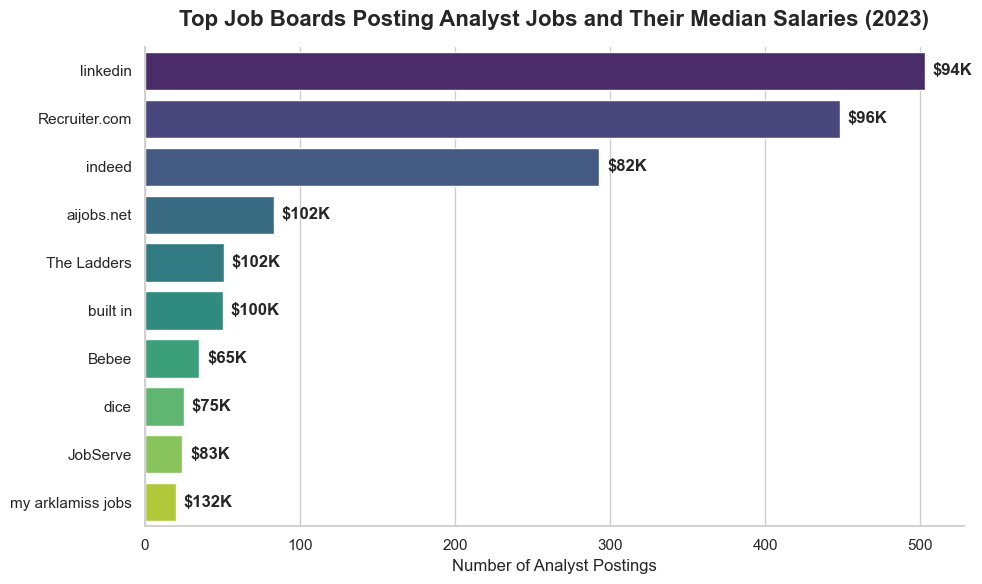

In [299]:
# Top U.S. Job Sites for Analyst Roles with 2023 Salary Data

# Set chart theme and size
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))

# Create barplot
ax = sns.barplot(
    data=DA_top_website_with_2023_salary,
    x='post_count',
    y='website',
    hue='website',
    palette='viridis'
)

# Title and labels

plt.title('Top Job Boards Posting Analyst Jobs and Their Median Salaries (2023)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Number of Analyst Postings')
plt.ylabel('')

# Remove spines 
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)

# Annotate with median salaries
for i, (count, salary) in enumerate(zip(
    DA_top_website_with_2023_salary['post_count'],
    DA_top_website_with_2023_salary['median_salary']
)):
    ax.text(
        count + 5,  # offset the text slightly to the right
        i,           # y-coordinate is the index
        f'${int(salary/1000):,}K',  # format salary
        va='center',
        fontsize=12,
        fontweight='semibold'
    )

plt.tight_layout()
plt.show()

## Where Data Engineer and Data Scientist Jobs Were Posted Most Often (2023)

This section identifies the top websites where Data Engineer and Data Scientist roles were posted in 2023. It also compares the posting volume and median salary per site.
This analysis provides insights into the distribution of Data Engineer and Data Scientist job postings across different platforms and the associated compensation levels.

In [300]:
# Filter job listing for Data Engineer with valid salary and website data

df_2023_DE = df_2023[df_2023['clean_title'].str.contains('Data Engineer', case=False, na=False)
                     & df_2023['salary_yearly'].notna()
                     & df_2023['website'].notna()
                     ].copy()

In [302]:
# Display DataFrame df_2023_DE information

df_2023_DE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 844 to 33042
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            85 non-null     datetime64[ns]
 1   date                 85 non-null     object        
 2   year                 85 non-null     int32         
 3   month                85 non-null     int32         
 4   company_name         85 non-null     object        
 5   location             84 non-null     object        
 6   website              85 non-null     object        
 7   employment_type      85 non-null     object        
 8   remote_work          85 non-null     bool          
 9   seniority_level      85 non-null     object        
 10  clean_title          85 non-null     object        
 11  salary_standardized  85 non-null     float64       
 12  salary_hourly        0 non-null      float64       
 13  salary_yearly        85 non-null     

In [303]:
# Inspecting the descriptive statistics for df_2022_DE 

df_2023_DE.describe()

,date_time,year,month,salary_standardized,salary_hourly,salary_yearly
count,85,85.0,85.000000,85.000000,0.0,85.000000
mean,2023-07-28 15:46:28.093034496,2023.0,7.388235,128084.376471,NaN,128084.376471
min,2023-01-07 04:00:26.138727,2023.0,1.000000,54000.000000,NaN,54000.000000
25%,2023-04-26 03:00:38.134283008,2023.0,4.000000,105000.000000,NaN,105000.000000
50%,2023-08-15 03:00:35.575930880,2023.0,8.000000,122500.000000,NaN,122500.000000
75%,2023-10-14 03:00:38.169250048,2023.0,10.000000,150000.000000,NaN,150000.000000
max,2023-12-23 04:00:28.568396,2023.0,12.000000,217500.000000,NaN,217500.000000
std,NaN,0.0,3.402010,35805.314611,NaN,35805.314611


In [304]:
# Count number of job listings for Data Enginner per website 

website_count_DE_2023 = df_2023_DE['website'].value_counts().head(5).reset_index()
website_count_DE_2023

,website,count
0,linkedin,49
1,aijobs.net,22
2,Recruiter.com,6
3,indeed,5
4,built in,1


In [305]:
# Calculate Data Engineer median salary for each website

DE_median_2023_salary = df_2023_DE.groupby('website')['salary_yearly'].median().reset_index()
DE_median_2023_salary

,website,salary_yearly
0,Recruiter.com,105800.0
1,aijobs.net,147500.0
2,built in,140000.0
3,built in la,132000.0
4,built in nyc,165000.0
5,indeed,105000.0
6,linkedin,122500.0


In [306]:
# Merge the DataFrames on website

DE_top_website_with_2023_salary = pd.merge(website_count_DE_2023, DE_median_2023_salary, on='website')

DE_top_website_with_2023_salary

,website,count,salary_yearly
0,linkedin,49,122500.0
1,aijobs.net,22,147500.0
2,Recruiter.com,6,105800.0
3,indeed,5,105000.0
4,built in,1,140000.0


In [307]:
# Remaning the columns for clarity

DE_top_website_with_2023_salary = DE_top_website_with_2023_salary.rename(columns={'salary_yearly': 'median_salary',
                                                                                  'count' : 'post_count'
                                                                        })

DE_top_website_with_2023_salary

,website,post_count,median_salary
0,linkedin,49,122500.0
1,aijobs.net,22,147500.0
2,Recruiter.com,6,105800.0
3,indeed,5,105000.0
4,built in,1,140000.0


In [308]:
# Filter job listing for Data Scientist with valid salary and website info

df_2023_DS = df_2023[df_2023['clean_title'].str.contains('Data Scientist', case=False, na=False)
                     & df_2023['salary_yearly'].notna()
                     & df_2023['website'].notna()
                     ].copy()

In [309]:
# Count number of job listings for Data Scientist per website 

website_count_DS_2023 = df_2023_DS['website'].value_counts().head(5).reset_index()
website_count_DS_2023

,website,count
0,linkedin,67
1,aijobs.net,34
2,indeed,4
3,The Ladders,3
4,Recruiter.com,2


In [310]:
# Calculate Data Scientist median salary for each website

DS_median_2023_salary = df_2023_DS.groupby('website')['salary_yearly'].median().reset_index()
DS_median_2023_salary

,website,salary_yearly
0,Bebee,125000.00
1,Recruiter.com,83793.00
2,The Ladders,125000.00
3,aijobs.net,157500.00
4,built in,80000.00
5,indeed,148564.09
6,linkedin,162500.00


In [311]:
# Merge the DataFrames on website

DS_top_website_with_2023_salary = pd.merge(website_count_DS_2023, DS_median_2023_salary, on='website')

In [312]:
# Remaning the columns for clarity

DS_top_website_with_2023_salary = DS_top_website_with_2023_salary.rename(columns={'salary_yearly': 'median_salary',
                                                                                  'count' : 'post_count'
                                                                        })

DS_top_website_with_2023_salary

,website,post_count,median_salary
0,linkedin,67,162500.00
1,aijobs.net,34,157500.00
2,indeed,4,148564.09
3,The Ladders,3,125000.00
4,Recruiter.com,2,83793.00


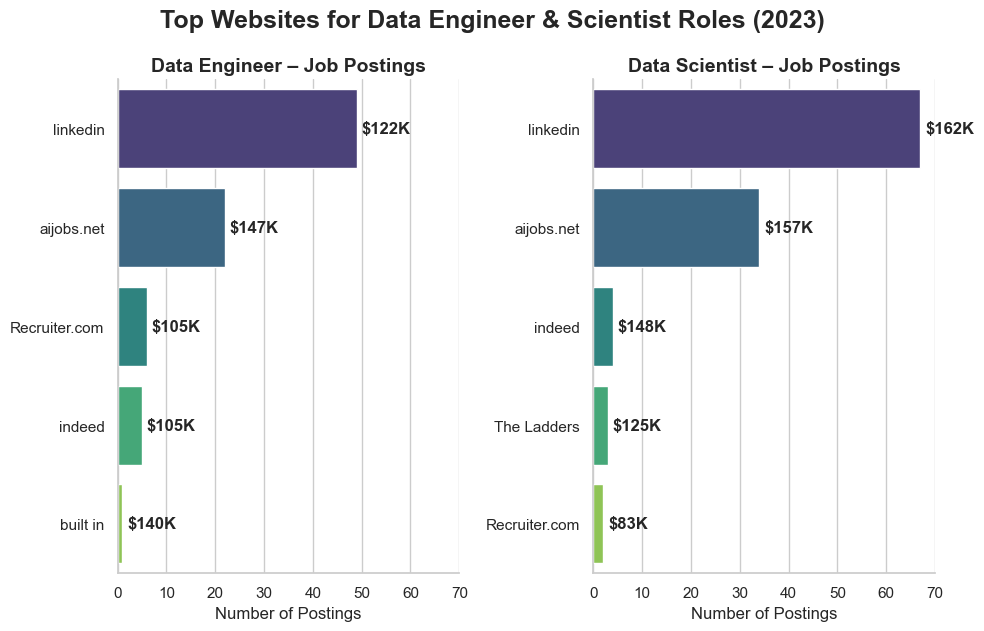

In [313]:
# Top U.S. Job Sites for Data Engineer and Data Scientist Roles with 2023 Salary Data


# Create summary DataFrames for DE & DS
DE_summary = DE_top_website_with_2023_salary.copy()
DE_summary['Role'] = 'Data Engineer'

# Create dummy DS data or use your real filtered df_2023_DS
DS_summary = DS_top_website_with_2023_salary.copy()
DS_summary['Role'] = 'Data Scientist'

# Combine into one DataFrame
combined_summary = pd.concat([DE_summary, DS_summary])

# Plot subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharex=False)

# Remove spines 
sns.despine()

# Annotation of Data Engineer and Data Scientist roles
for ax, role in zip(axes, combined_summary['Role'].unique()):
    subset = combined_summary[combined_summary['Role'] == role]
    sns.barplot(data=subset, x='post_count', y='website', hue='website', ax=ax, palette='viridis')
    ax.set_title(f'{role} – Job Postings', fontsize=14, fontweight='semibold')
    ax.set_xlabel('Number of Postings')
    ax.set_xlim(0, 70)
    ax.set_ylabel('')
    #ax.legend().remove()
    # Annotation Median Salary for Roles
    for i, (count, salary) in enumerate(zip(subset['post_count'], subset['median_salary'])):
        ax.text(count + 1, i, f'${int(salary/1000):,}K', va='center', fontsize=12, fontweight='semibold')

plt.tight_layout()
plt.suptitle('Top Websites for Data Engineer & Scientist Roles (2023)', fontsize=18, fontweight='bold', y=1.05)
plt.show()